## DATA SCIENCE PROJECT ON  INX FUTURE INC EMPLOYEE PERFORMANCE ANALYSIS


## BUISNESS CASE:BASED ON GIVEN FEATURE OF DATASET WE NEED TO PREDICT THE PERFOMANCE RATING OF EMPLOYEE


### VISUALIZATION SUMMARY: 
1. Domain Analysis Of all features
2. Univariate Analysis with insights
3. Bivariate Analysis with insights
4. Multivariat Analysis with insights

### IMPORTING THE NECESSAERY LIBRARY

In [1]:
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')  # setting up background
from scipy import stats

# TO avoid warnings
import warnings 
warnings.filterwarnings('ignore')

#### IMPORT DATA FROM SQL SERVER USING PYODBC

In [2]:
# Create Connection String and Connect by using Pyodbc
cnxn_str = ('Driver={SQL Server};' 
            "Server={LAPTOP-DMS3CURR};"
            "Database={Employee};"
            "Trusted_connection=yes;")

cnn = pyodbc.connect(cnxn_str)

In [3]:
# Run SQL and load dataset          
sql_query = pd.read_sql('SELECT * FROM Employee_Performance', cnn)

# convert into dataframe
data = pd.DataFrame(sql_query)


# Initial data exploration
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,1001000.0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,False,3
1,1001006.0,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,False,3
2,1001007.0,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,False,4
3,1001009.0,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,False,3
4,1001010.0,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,False,3


### DOMAIN ANALYSIS

**First understand the menaing of feature and checking the impact of input feature to dependant feature**

##### 1.EmpNumber: 
 An Employee ID, sometimes referred to as an Employee Number or Employee Code, is a unique number that has been assigned to each individual staff member within a company.
 
##### 2.Age:
Age of employee in years

##### 3.Gender:
Gender of employee [Male/Feamale]

##### 4.EducationBackground:
This will be a high school diploma or a post-secondary degree of a employee

##### 5.MaritalStatus:
Civil status, or marital status, are the distinct options that describe a person's relationship with a significant other

##### 6.EmpDepartment:
Department specifice of employee

##### 7.EmpJobRole:
Job role means the key responsibility of a job profile or job position. 

##### 8.BusinessTravelFrequency:
The employee travel for comapny buisness purpose.

##### 9.DistanceFromHome:
Distance between home to company of employee.

##### 10.EmpEducationLevel:
Employee Education level means the academic qualification. For example, it could be a diploma, degree, masters or PhD.

##### 11.EmpEnvironmentSatisfaction:
satisfied or content employees are with elements like their jobs, their employee experience, and the organizations they work for.

##### 12.EmpHourlyRate:
Hourly Rate means the amount paid to an employee for each hour worked.

##### 13.EmpJobInvolvement:
Job involvement refers to a state of psychological identification with work—or the degree to which a job is central to a person's identity. From an organizational perspective, it has been regarded as the key to unlocking employee motivation and increasing productivity.

##### 14.EmpJobLevel:
Job levels, also known as job grades and classifications, set the responsibility level and expectations.

##### 15.EmpJobSatisfaction:
level of contentment employees feel with their job.

##### 16.NumCompaniesWorked:
employee work in how many companies.

##### 17.OverTime:
employee work overtime or not. [True, False]

##### 18.EmpLastSalaryHikePercent:
salary hike percent of employye in last year.

##### 19.EmpRelationshipSatisfaction:
Healthy relationships may motivate employees and increase morale. When employees cast aside relationship issues, they can focus on work tasks more effectively.

##### 20.TotalWorkExperienceInYears:
Total experiance of employee in years.

##### 21.TrainingTimesLastYear:
Total training done by employee in last year.

##### 22.EmpWorkLifeBalance:
“Work-life balance” typically means the achievement by employees of equality between time spent working and personal life. A good work-life balance for employees can improve staff motivation, increase staff retention rates, reduce absence, attract new talent, and reduce employee stress.

##### 23.ExperienceYearsAtThisCompany:
Total no of eaxperiance at current company.

##### 24.ExperienceYearsInCurrentRole:
Total no of experiance in current job role.

##### 25.YearsSinceLastPromotion:
Total no of year since last promotion of employee.

##### 26.YearsWithCurrManager:
Employee total no of years with current manager. 

##### 27.Attrition:
Employee attrition is the naturally occurring, voluntary departure of employees from a company. Employee attrition involves leaving a job for: Personal reasons. Professional motivation.

##### 28.PerformanceRating:
This is a target feature, tell that the total rating of employee performance in company.


## UNIVARIATE ANALYSIS

##### PLOTS USED:
**continuous features** 
* histogram: A histogram is a bar graph-like representation of data that buckets a range of classes into columns along the horizontal x-axis. The vertical y-axis represents the number count or percentage of occurrences in the data for each column. 
* lineplots:A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency of each value.

**Discrete and Categorical**
* Countplot: countplot is used to Show the counts of observations in each categorical bin using bars.

**1.Age**

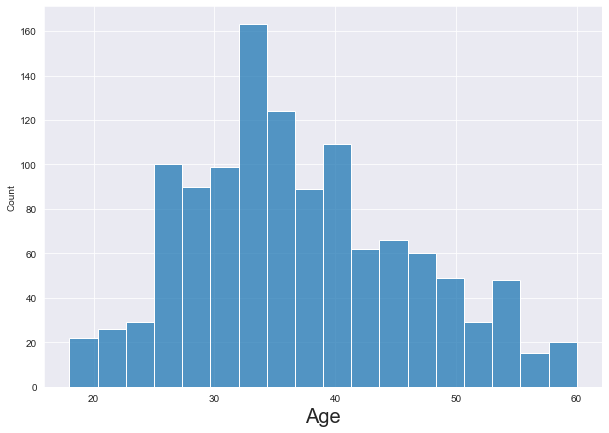

In [4]:
plt.figure(figsize=(10,7))
sns.histplot(x='Age',data=data)
plt.xlabel('Age',fontsize=20)
plt.show()

**Observation:** 
* The range of age between 18 to 60, most of the employee age between 25 to 40.

**2.Employee Hourly Rate**

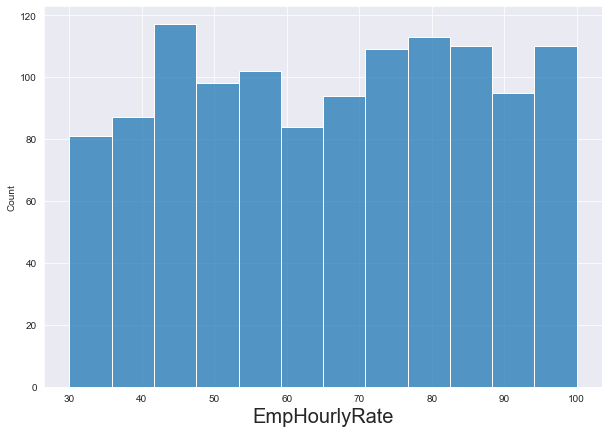

In [5]:
plt.figure(figsize=(10,7))
sns.histplot(x='EmpHourlyRate',data=data)
plt.xlabel('EmpHourlyRate',fontsize=20)
plt.show()

**Observation:** The range of employee hourly rate between 30 to 100, most of the employee hourly rate is 45.

**3.Total Work Experience In Year**

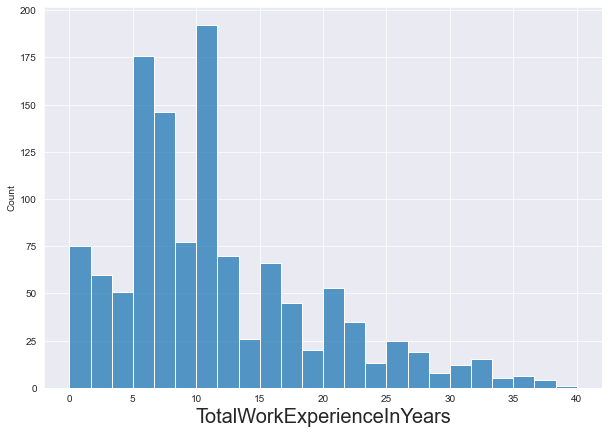

In [6]:
plt.figure(figsize=(10,7))
sns.histplot(x='TotalWorkExperienceInYears',data=data)
plt.xlabel('TotalWorkExperienceInYears',fontsize=20)
plt.show()

**Observation:** Work experiance range between 0 to 40,Most of the employee experiance ranges between 5 to 10.

**4.Experience Years At This Company**

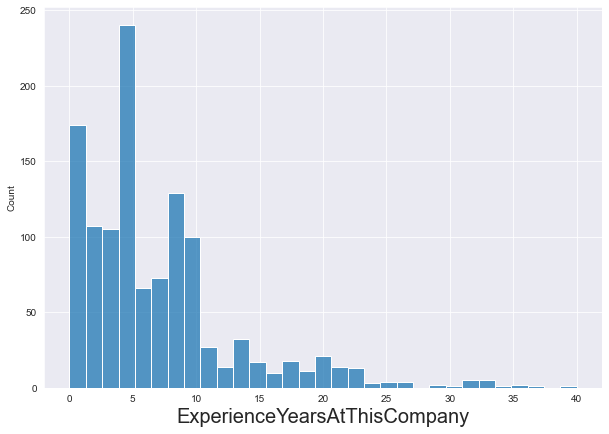

In [7]:
plt.figure(figsize=(10,7))
sns.histplot(x='ExperienceYearsAtThisCompany',data=data)
plt.xlabel('ExperienceYearsAtThisCompany',fontsize=20)
plt.show()

**Observation:** The Range of experiance in same comapny is 0 to 40,most of the employee join between 0 to 5.  

### USE SUBPLOT TO PLOTS MULTIPLE FEATURE

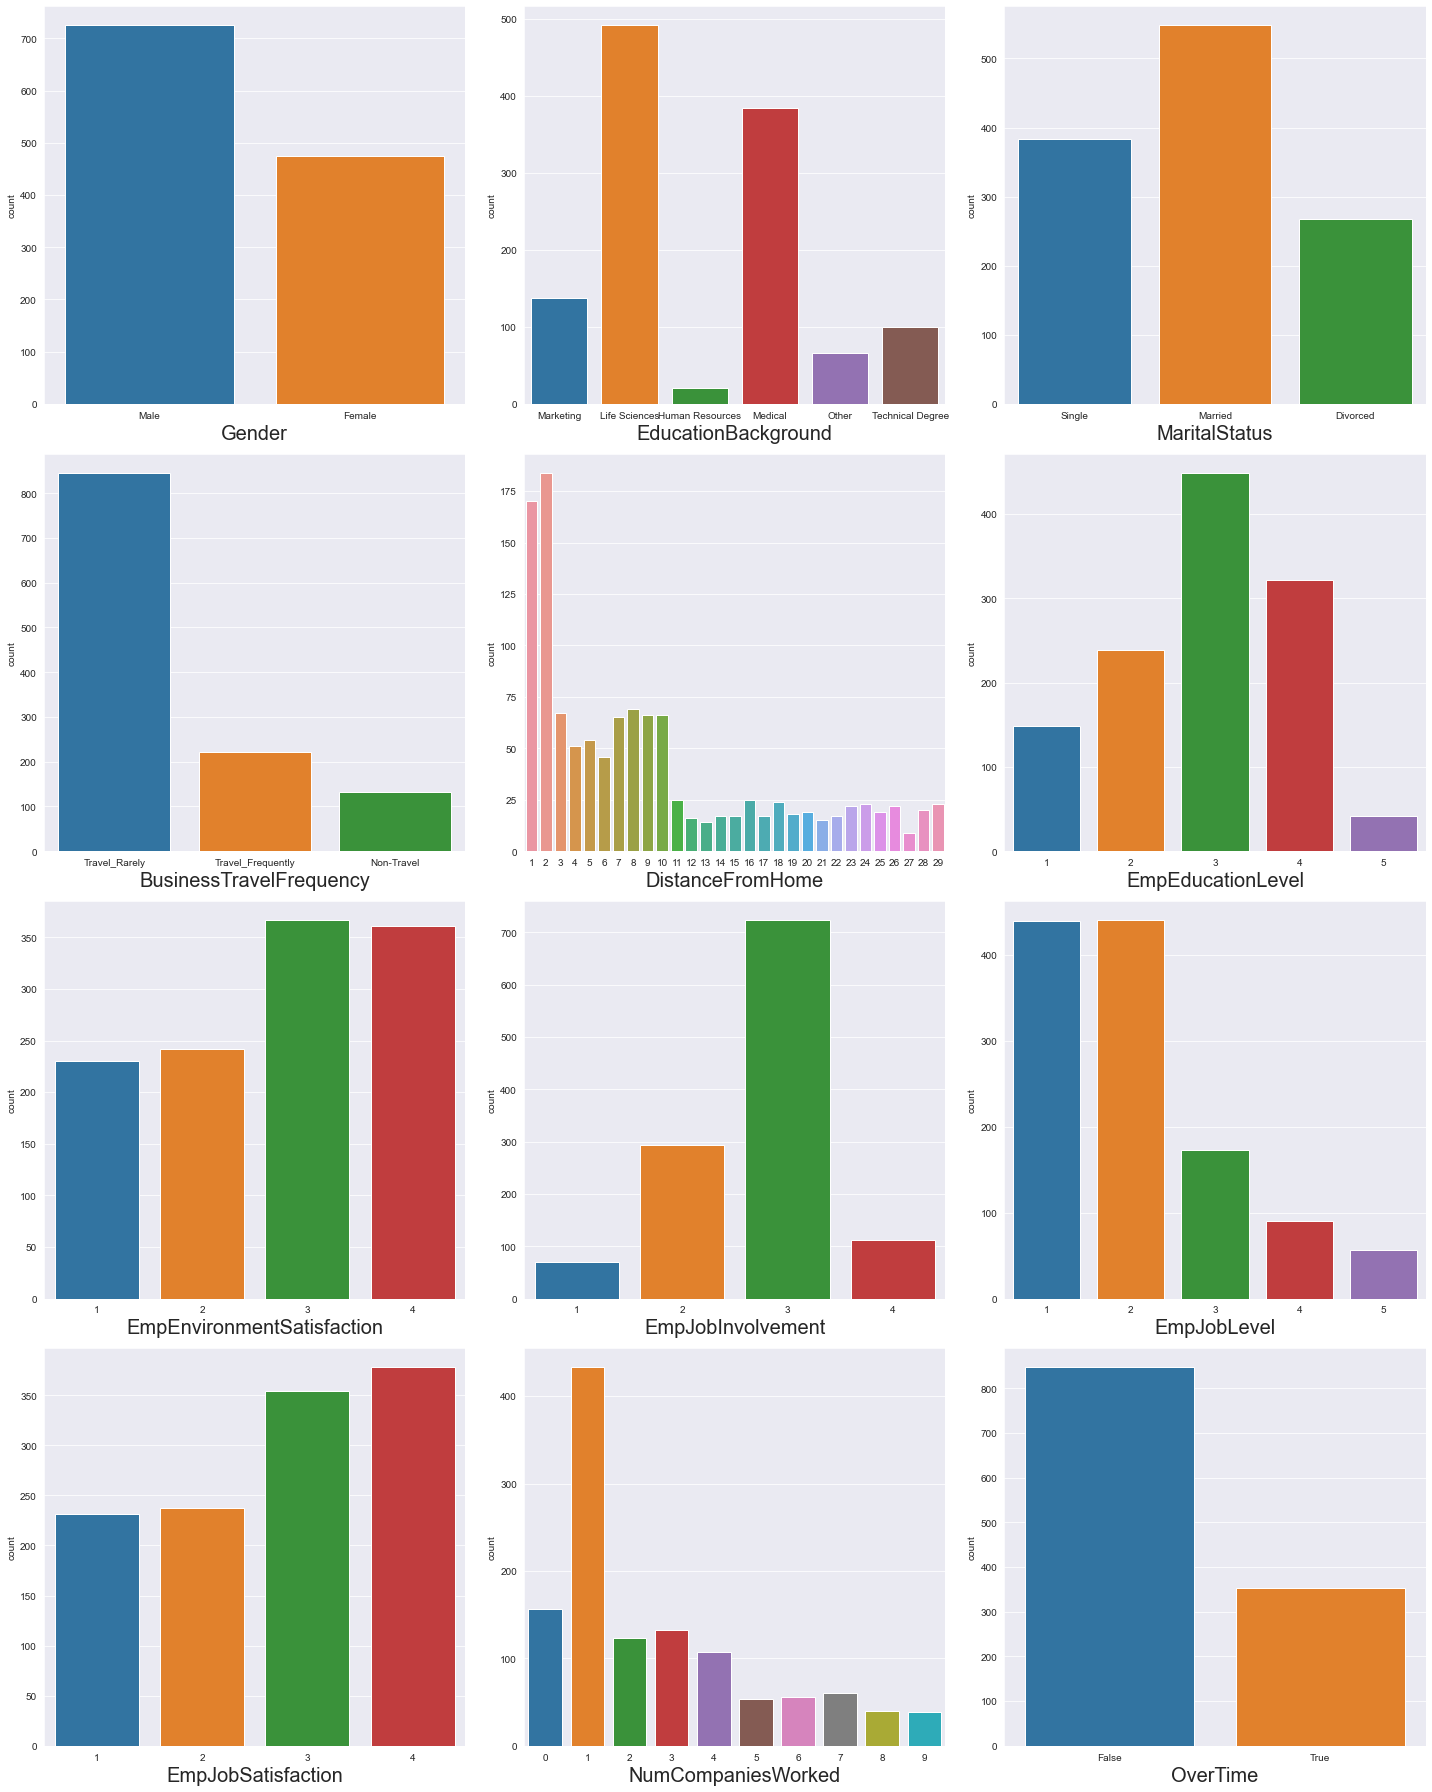

In [8]:
count = data[['Gender', 'EducationBackground', 'MaritalStatus','BusinessTravelFrequency','DistanceFromHome',
              'EmpEducationLevel', 'EmpEnvironmentSatisfaction','EmpJobInvolvement', 'EmpJobLevel',
              'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime']] # making lsit of next 12 feature

plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in count: # iteration of columns / acessing the columns from count 
    if plotno<=13:    # set the limit
        plt.subplot(4,3,plotno) # # plotting 12 graphs (4-rows,3-columns) ,plotnumber is for count
        sns.countplot(x=count[column]) # Plotting count plots because the feature data type is discerte and categorical
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction


### Observation:
#### 5.Gender:
* Most of the male present in the comapany

#### 6.Education Background:
* most of the education background of employee is Life science and medical, as well as marketing eduaction background employee is more than 100.
* other eduacation background employee is less than 100.

#### 7.MaritalStatus:
* Most of the employee is married as well as less than 400 employee is single.
* less than 300 employee mariatal status is divorced.

#### 8.Business Travel Frequency:
* Maximum no of employee travel rarely for company buisness purpose,less than 220 employee travel frequently
* remaining less than 120 employee not travell for buisness purpose.

#### 9.Distance From Home:
* The range of distance between home to comapny is 1 to 29.
* Maximum no of employee home to company distance is less than 10.

#### 10.Educational Level:
* Total range of educational level is 1 to 5,Maximum no of employee education level is 3 & 4.
* 2 education level employee is less than 250 and remianing 1 & 5 education level employee is less than 150.

#### 11.Employee Environment Satisfaction:
* Most of the employee Statisfaction is 3 & 4 
* 1 & 2 enviroment satisfaction employee less than 250

#### 12.Employee Job Involvement:
* Most of the employee job involvement is 3 as well as 2 job involment employee is less than 300.
* Remaining 1 and 4 job involvment employee is less than 100.

#### 13.Employee Job Level:
* The range of employee job kevel is 1 to 5,most of the employee job level is 1 & 2.
* Minimum no of job level is 5, as well as 3 & 4 job level employee is less than 180.

#### 14.Employee Job Satisfaction:
* Most of the employee job satisfaction is 3 & 4 score as well as 1 & 2 score jon satisfaction employee is less than 250.

#### 15.Number Companies Worked:
* Maximum no of employee work with only one company.
* less no of employee work in more than 5 companies.

#### 16.Overtime:
* Most no of employee on doing over time and less than 350 employee doing overtime in company.

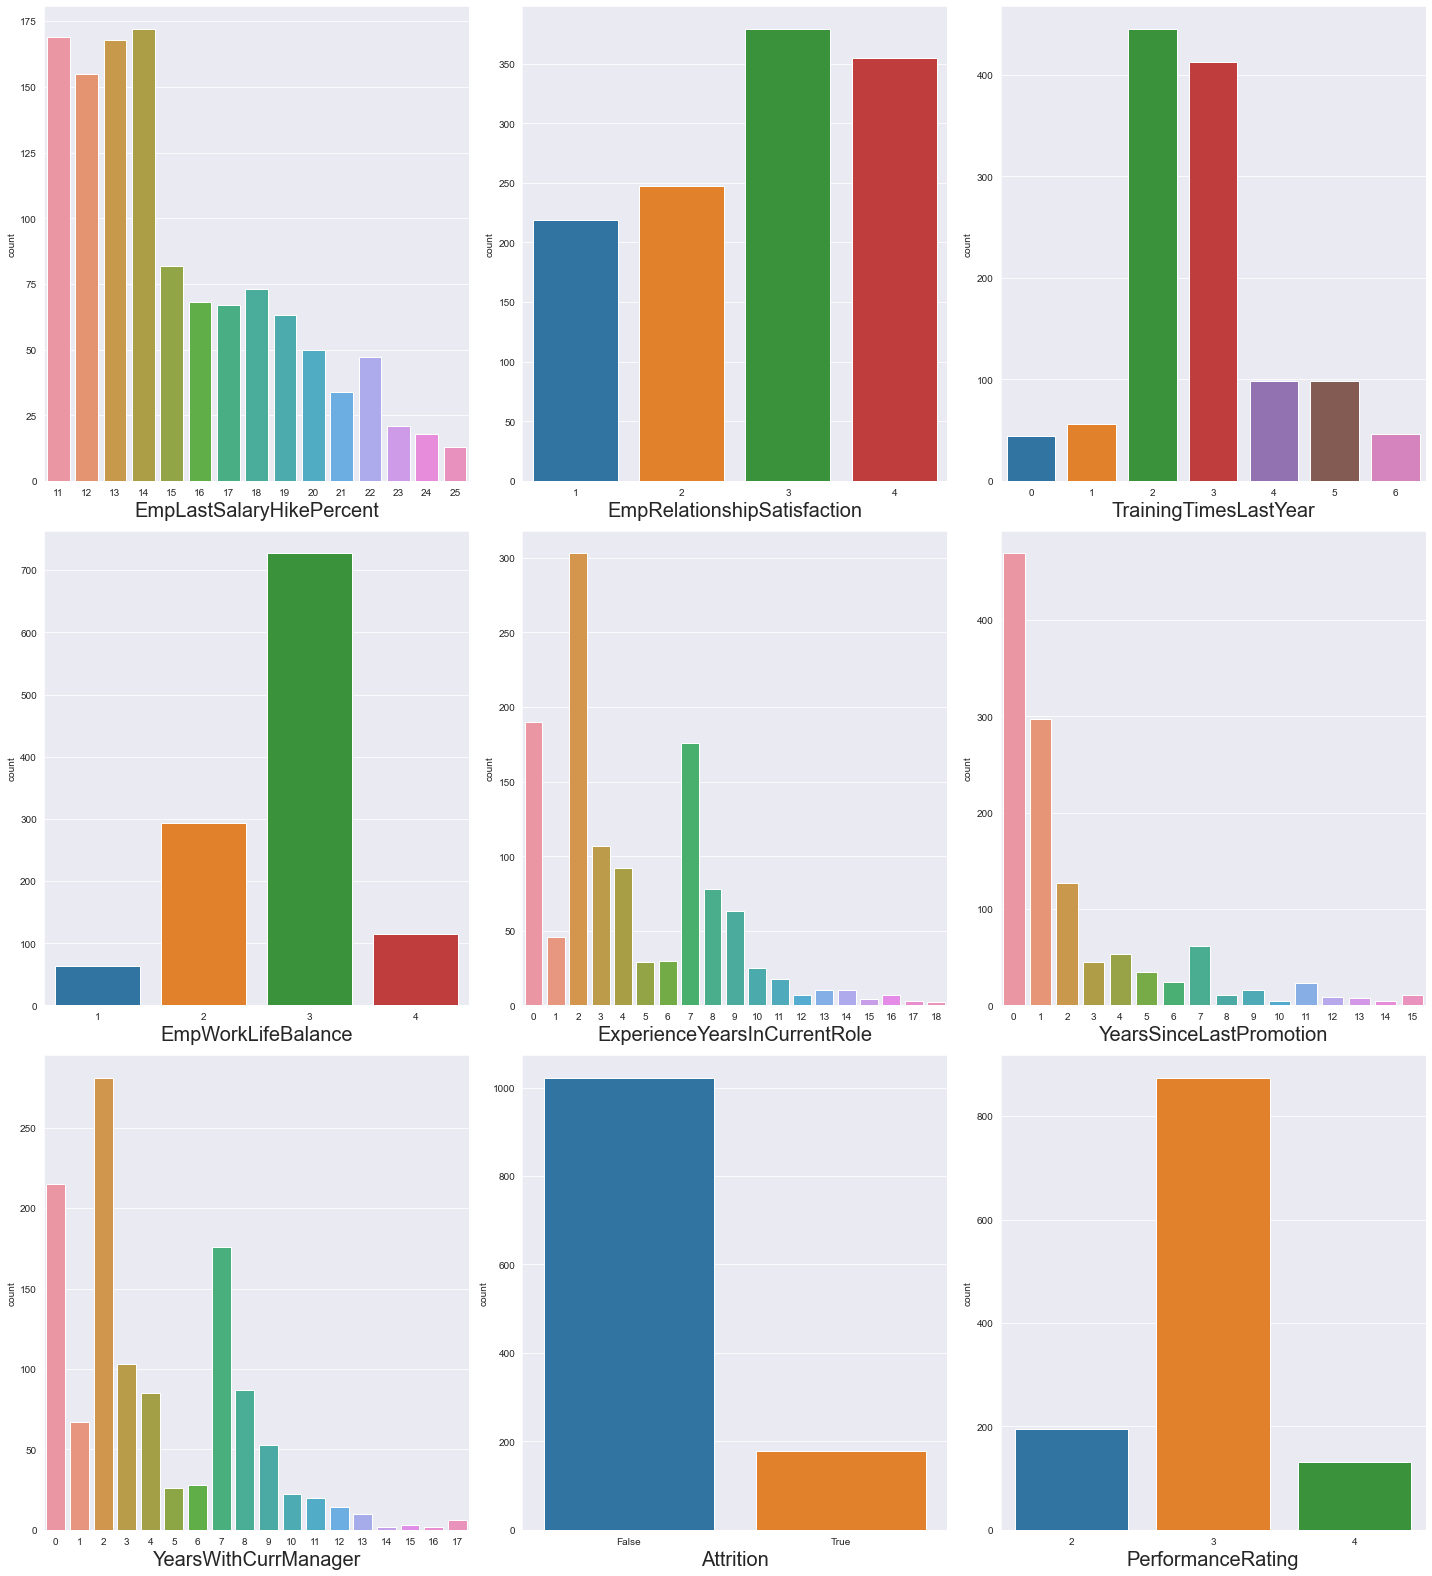

In [9]:
count2 = data[['EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction','TrainingTimesLastYear','EmpWorkLifeBalance',
               'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager', 'Attrition', 
               'PerformanceRating']]  #Making nex feature list to plot the graph

plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in count2: # iteration of columns / acessing the columns from count 
    if plotno<=10:    # set the limit
        plt.subplot(3,3,plotno) # # plotting 9 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.countplot(x=count2[column]) # Plotting count plots because the feature data type is discerte and categorical
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction


### Observation: 
#### 17.Employee Last Salary Hike Percent:
* Most no of employee salary hike percentage between 11 to 14%.total range of salary hike is 11 to 25.
* less than 80 employee last salary hike in between 15 to 19.

#### 18.Employee Relationship Satisfaction:
* The range of employee relationship satisfaction is 1 to 4,Most of the relation satisfaction is 3 & 4 as well as less than 250 employee with 1 & 2 relationship satisfaction.

#### 19.Training Times LastYear:
* The range of training time in last year between 0 to 6, Most of the employee doing 2 & 3 rd time training and remaining all times is less than 100.

#### 20.Employee Work Life Balance:
* Most most the work life balance is 3 than less than 300 employee work life balance is 2.
* Minimum work life balance is 1 as well as less than 100 employee work life balance is 4.

#### 21.Experiance In Current Role:
* Maximum current role experiance of employee is 18.
* Most of the employee have 2 years of expriance in current role then 7 year of experiance employee is less than 180
* less than 200 employee have not current role experiance.

#### 22.Years Since Last Promotion:
* The range of year since last promotion is 0 to 15.
* Most of the employee has not promoted in last year less than 300 employee has promoted atleast 1 year.

#### 23.Years With Current Manager:
* Most employee have 2 years with current manager and minimum 16 years with current manager.
* The range in between 0 to 17 and less than 180 employee has 7 years with current manager.

#### 24.Attrition:
* Maximum no of employee has not leave the company and less than 200 employee has going to leave the company.

#### 25. Target Feature == Performance Rating:
* The range of performance rating is 2 to 4, most of the employee have 3 performance ranting and less performance rating is 4.
* less than 200 employee has 2 performance rating.

#### 26.Employee Department

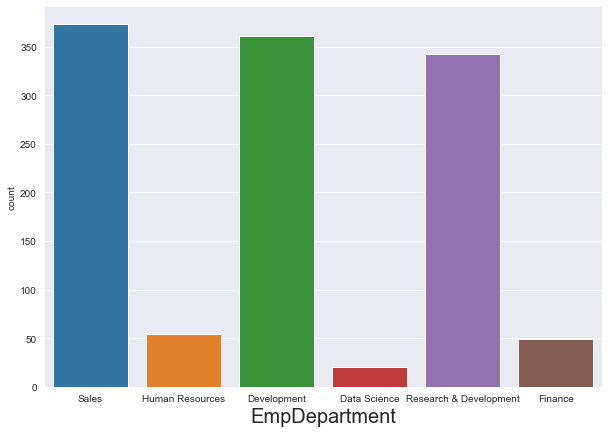

In [10]:
plt.figure(figsize=(10,7))
sns.countplot('EmpDepartment',data=data)
plt.xlabel('EmpDepartment',fontsize=20)
plt.show()

**Observation:**
* Most of the employee from sales department as well as Development and research & Development departmnet employee is less than 320
* Human resources & finance department employee is almost equal.
* Data science employee has minimum in company.

#### 27.Employee Job Role

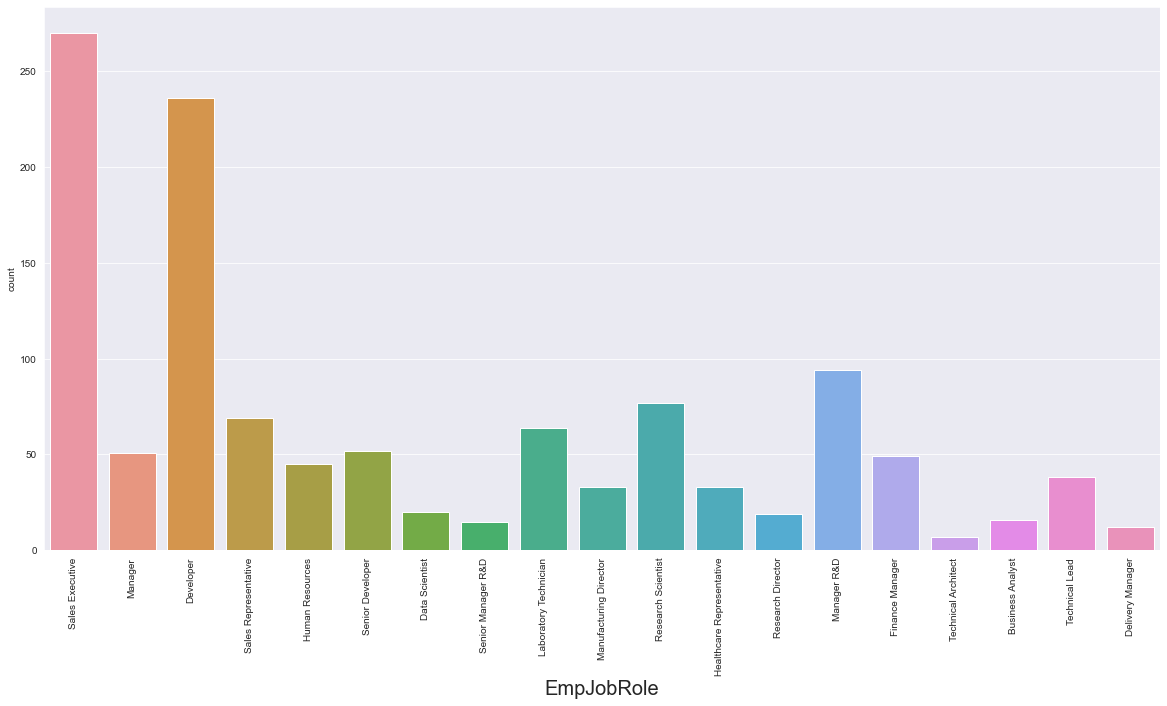

In [11]:
plt.figure(figsize=(20,10))
sns.countplot('EmpJobRole',data=data)
plt.xticks(rotation='vertical')
plt.xlabel('EmpJobRole',fontsize=20)
plt.show()

**Observation:**
* Sales executive employee job role is maximum as well as Developer job role employee count is 230.
* Manage R& D and research scientist employee is less than 100 and remaining all job role employee is less than 65.

## BIAVARIATE ANALYSIS
* In Bivariate analysis Checking the relation between two features

#### ANALYSIS ON CONTINUOUS FEATURE
#### PLOT USED:
* Histogram, line plot used for continuous features
* Count used for categorical & Discrete data. 

**1.Relation Between age & Experience Years At This Company**

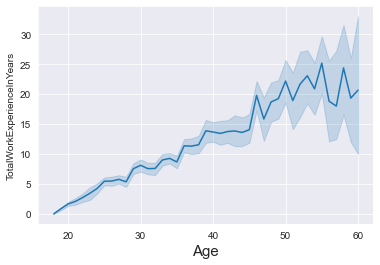

In [12]:
sns.lineplot(x='Age',y='TotalWorkExperienceInYears',data=data)
plt.xlabel('Age',fontsize=15)
plt.show()

**Observation:**
* If the age in between 18 to 25 then the total year of experiance is less than 5year.
* If the age is increases that time experiance also increases.

**2.Relation Between experiance year at this company & total work experiance**

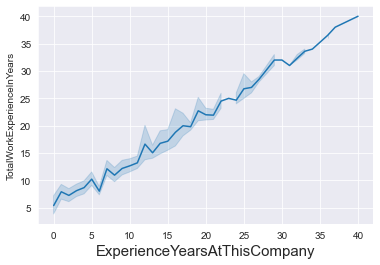

In [13]:
sns.lineplot(x='ExperienceYearsAtThisCompany',y='TotalWorkExperienceInYears',data=data)
plt.xlabel('ExperienceYearsAtThisCompany',fontsize=15)
plt.show()


**Observation:**
* If he experiance year at this company that time total work experiance also increases. 

**3.Relation between Employee last salary hike and number of company worked**

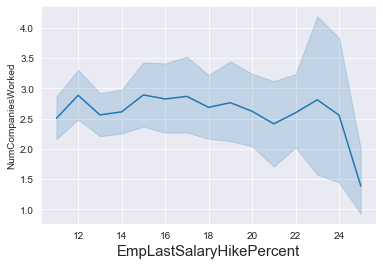

In [14]:
sns.lineplot(x='EmpLastSalaryHikePercent',y='NumCompaniesWorked',data=data)
plt.xlabel('EmpLastSalaryHikePercent',fontsize=15)
plt.show()


**Observation:**
* If the employee has work 1 or 2 company that time employee last salary hike percent is increases.

**4.Relation between Years Since Last Promotion and Experience Years In CurrentRole**

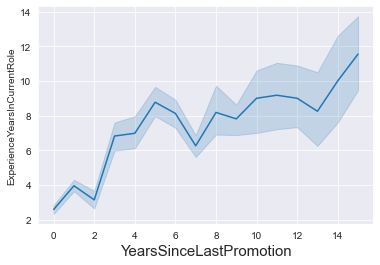

In [15]:
sns.lineplot(x='YearsSinceLastPromotion',y='ExperienceYearsInCurrentRole',data=data)
plt.xlabel('YearsSinceLastPromotion',fontsize=15)
plt.show()

**Observation:**
* In above plot clearly seen that year since last promotion is increases that time employee has more experiance with current role

**5.Relation between Employee Hourly Rate and Years With Current Manager**

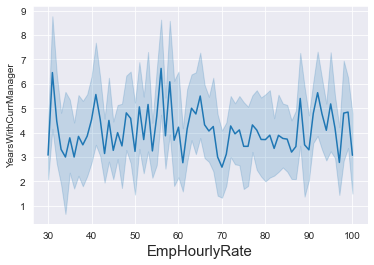

In [16]:
sns.lineplot(x='EmpHourlyRate',y='YearsWithCurrManager',data=data)
plt.xlabel('EmpHourlyRate',fontsize=15)
plt.show()

**Observation:**
* most of the employee hourly rate with their current manager is constant,but some of the employees has maximum hourly rate with less no of year with current manager.

**6.Relation between Distance From Home and Employee Last Salary Hike Percent**

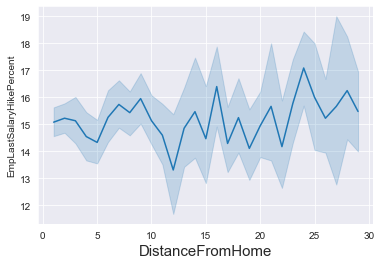

In [17]:
sns.lineplot(x='DistanceFromHome',y='EmpLastSalaryHikePercent',data=data)
plt.xlabel('DistanceFromHome',fontsize=15)
plt.show()

**Observation:**
* If the distance from home is more then the employee salary hike is slightly increases.
* distance from home between 10 to 13 that time employee salary hike is decreases.

#### ANALYSIS ON CATEGORICAL AND DISCERETE FEATURE

#### CREATE A NEW DATAFRAME FOR CATEGORICAL FEATURES.

In [18]:
categorical = []  # Create empty list to store the feature
for column in data.columns:
    if data[column].dtype == object:
        categorical.append(column)
        print(f"{column} : {data[column].unique()}")
        print("====================================")

Gender : ['Male' 'Female']
EducationBackground : ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
MaritalStatus : ['Single' 'Married' 'Divorced']
EmpDepartment : ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
EmpJobRole : ['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
BusinessTravelFrequency : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


In [19]:
categorical  # All categorical features 

['Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency']

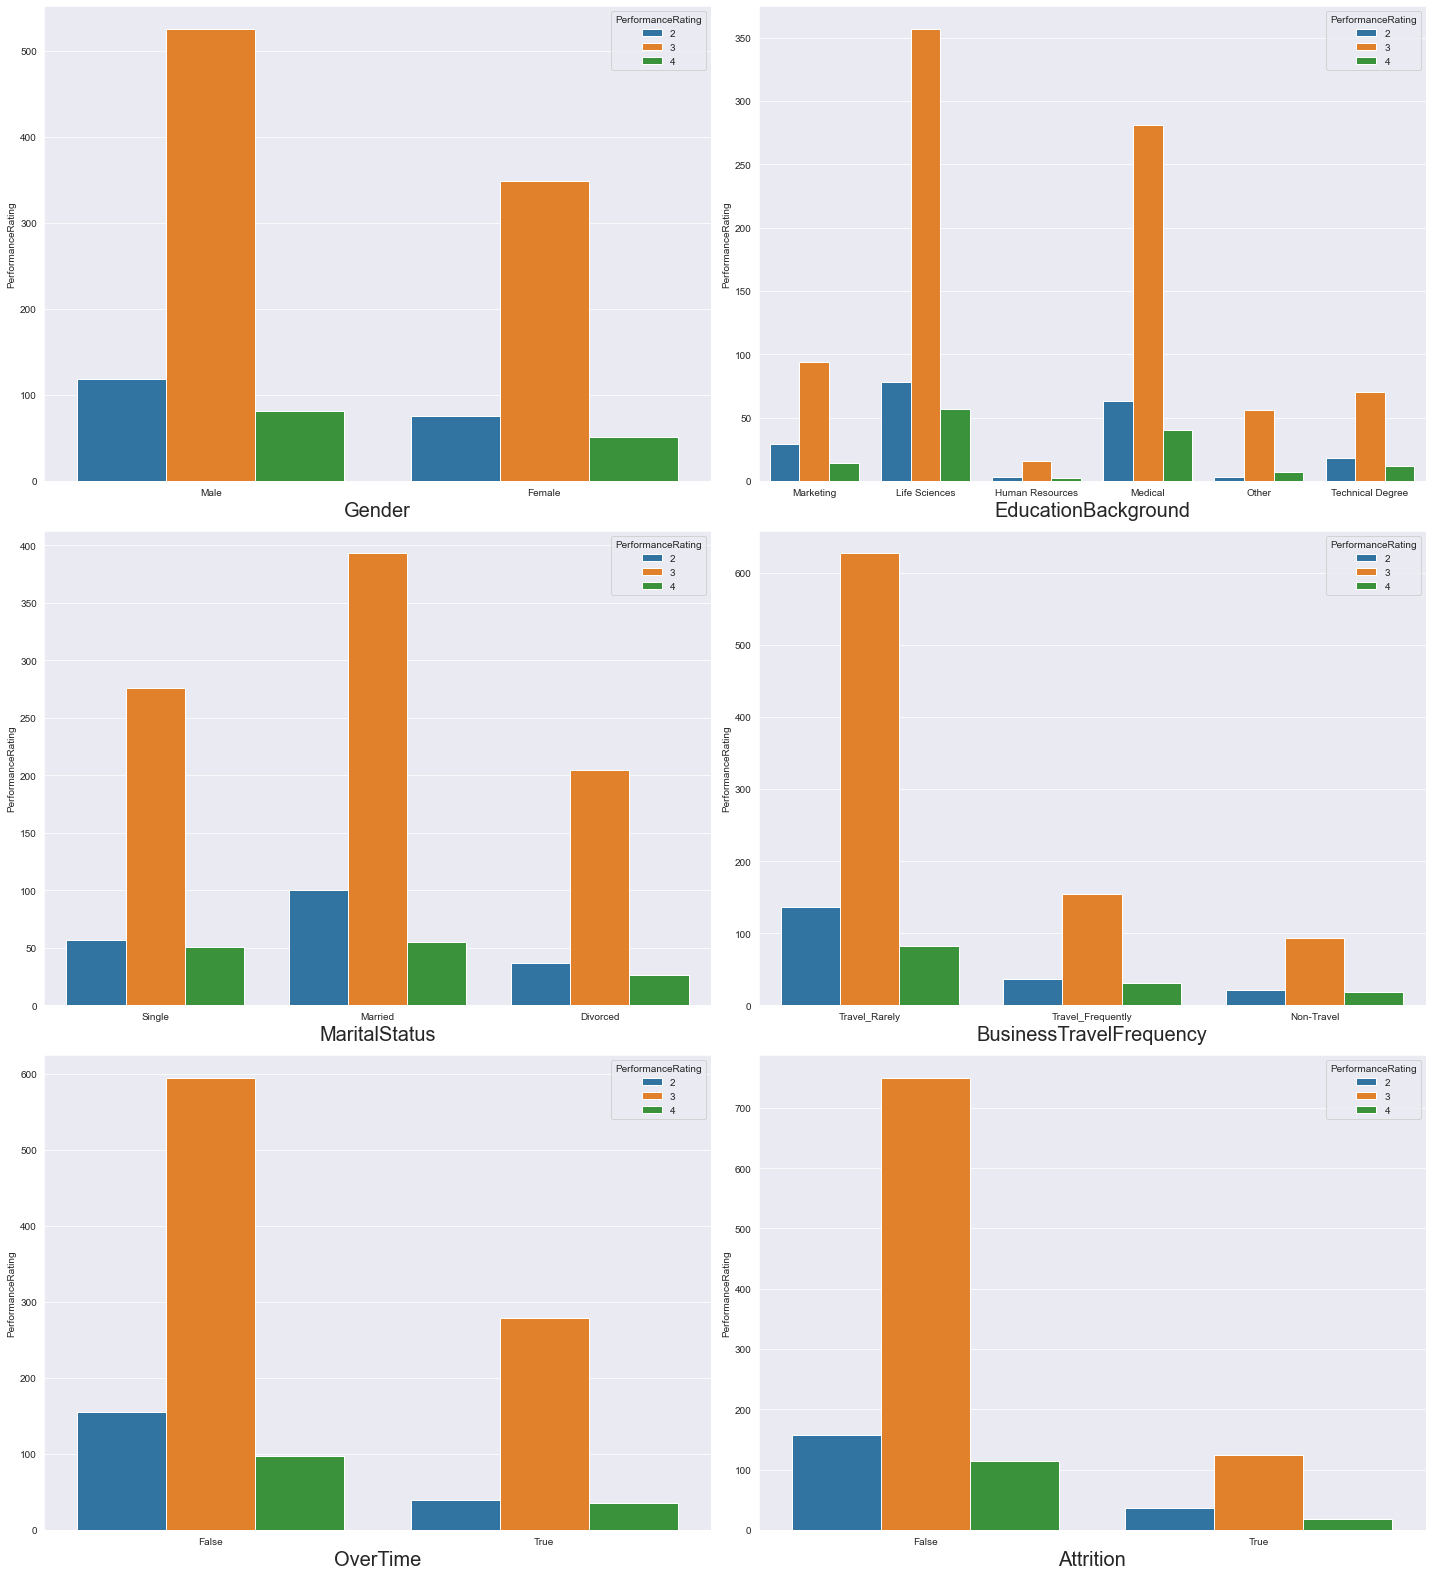

In [20]:
# Make a list of categorical feature and use sub plot to plot multiple feature
categorical_col = data[['Gender','EducationBackground','MaritalStatus','BusinessTravelFrequency','OverTime','Attrition']]
plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in categorical_col: # iteration of columns / acessing the columns from count 
    if plotno<=7:    # set the limit
        plt.subplot(3,2,plotno) # # plotting 6 graphs (3-rows,2-columns) ,plotnumber is for count
        sns.countplot(x=categorical_col[column],hue=data.PerformanceRating) # Plotting count plots because the feature is categorical
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
        plt.ylabel('PerformanceRating')
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction


### Observations:
#### 7. Relationship between Gender and performance rating
* Maximum no of male rated with 3 performance rating as well as in female also most of the feamle rated with 3 performance rating.
* four performance rating in both male & female is less

#### 8.Relationship between EducationBackground and performance rating
* Maximum life sciences and medical education background employee rated with 3 performance rating 
* life science and medical education background employee also rated with 2 & 4 performance rating most of the time

#### 9.Relationship between MaritalStatus and performance rating
* Most of the married employee rated with 3 performance rating as well as single and divorced marital status employee rated with 3 performance rating most of the time.
* In married marital status 2 performance rating emplyee is more than single or divorced.

#### 10.Relationship between Business Travel Frequency and performance rating
* Maximum no of travel rarely employee has get 3 performance rating
* Those employee travel frequentaly this employee also rated with 2, 3, and 4

#### 11.Relationship between Overtime and performance rating
* Maximum no of employee with no overtime has rated with 3 perfomance rating
* Those employee doing overtime that time 2 & 4 performance rating is constant.

#### 12.Relationship between Attrition and performance rating
* Most of the employee rated with 3 performance rating in no means(They are not leave the company)
* Those employee have 3 performace rating those also leave the company

**13.Relationship between employee department and performance rating**

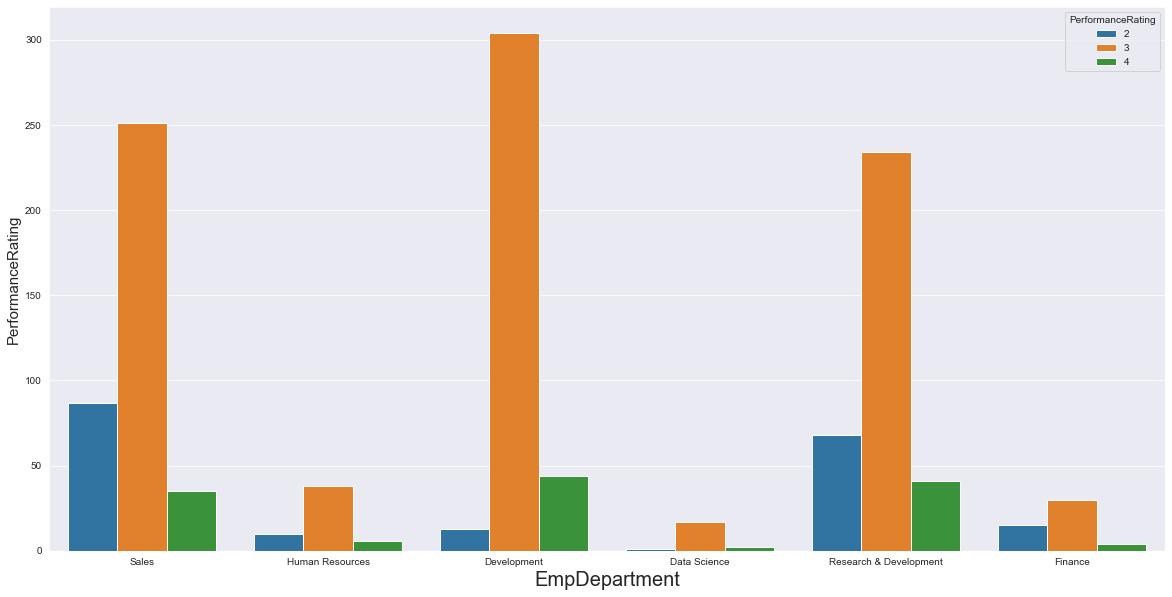

In [21]:
plt.figure(figsize=(20,10))
sns.countplot('EmpDepartment',hue=data.PerformanceRating,data=data)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

**Observation:**
* Most of the Development, Sales, And Research and development employee department has 3 peformance rating
* Data science department employee has low performance rating.
* In sales & Research and development department also 2 performance rating employee avilable most of the time.

**14.Relationship between employee job role and performance rating**

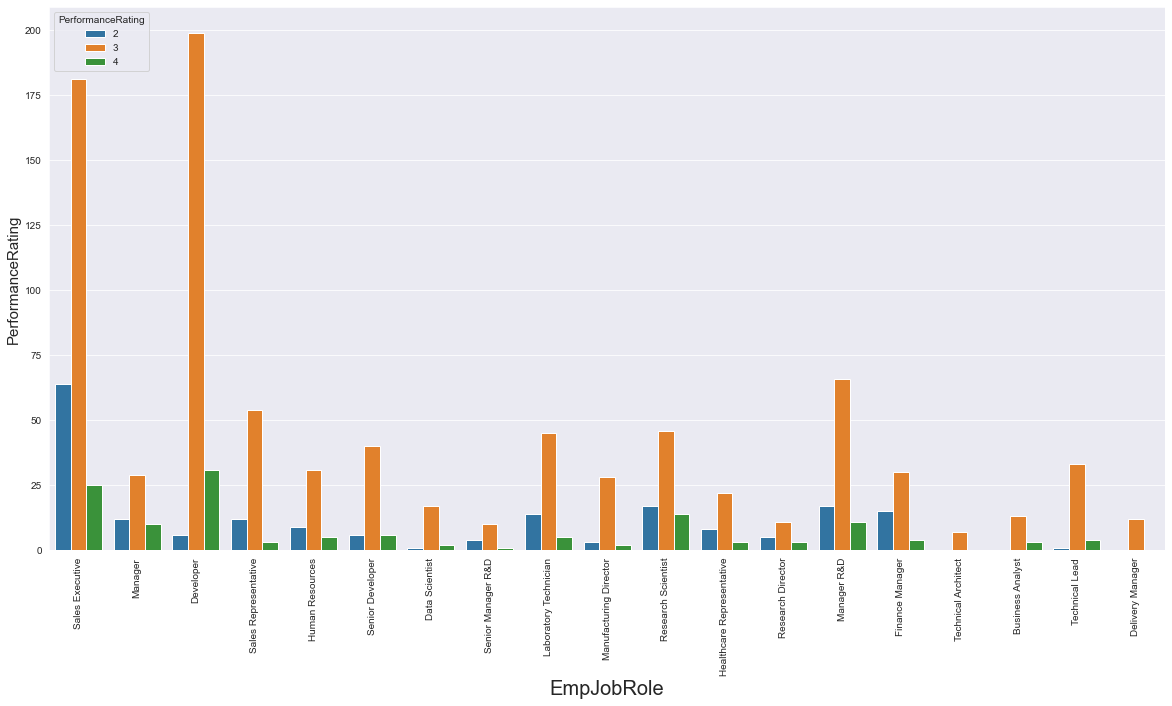

In [22]:
plt.figure(figsize=(20,10))
sns.countplot('EmpJobRole',hue=data.PerformanceRating,data=data)
plt.xticks(rotation='vertical')
plt.xlabel('EmpJobRole',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

**Observation:**
* Developers and sales executive job role employee performance rating is 3 most of the time.
* In technical architecture and delivery manger job role employee not rated with 2 & 4 performance rating.
* In sales excutive alsso less than 60 employee rated with 2 performance rating.
* Remaining all job role employee has 3 performance rating most of the time.

#### CREATE NEW DATAFRMAE FOR NUMERICAL FEATURES:

In [23]:
numerical_col = []
for column in data.columns:
    if data[column].dtype == "int64":
        data[column].unique()   # for continuos features we use unique>=10
        numerical_col.append(column)

In [24]:
numerical_col  # All numerical features

['Age',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'PerformanceRating']

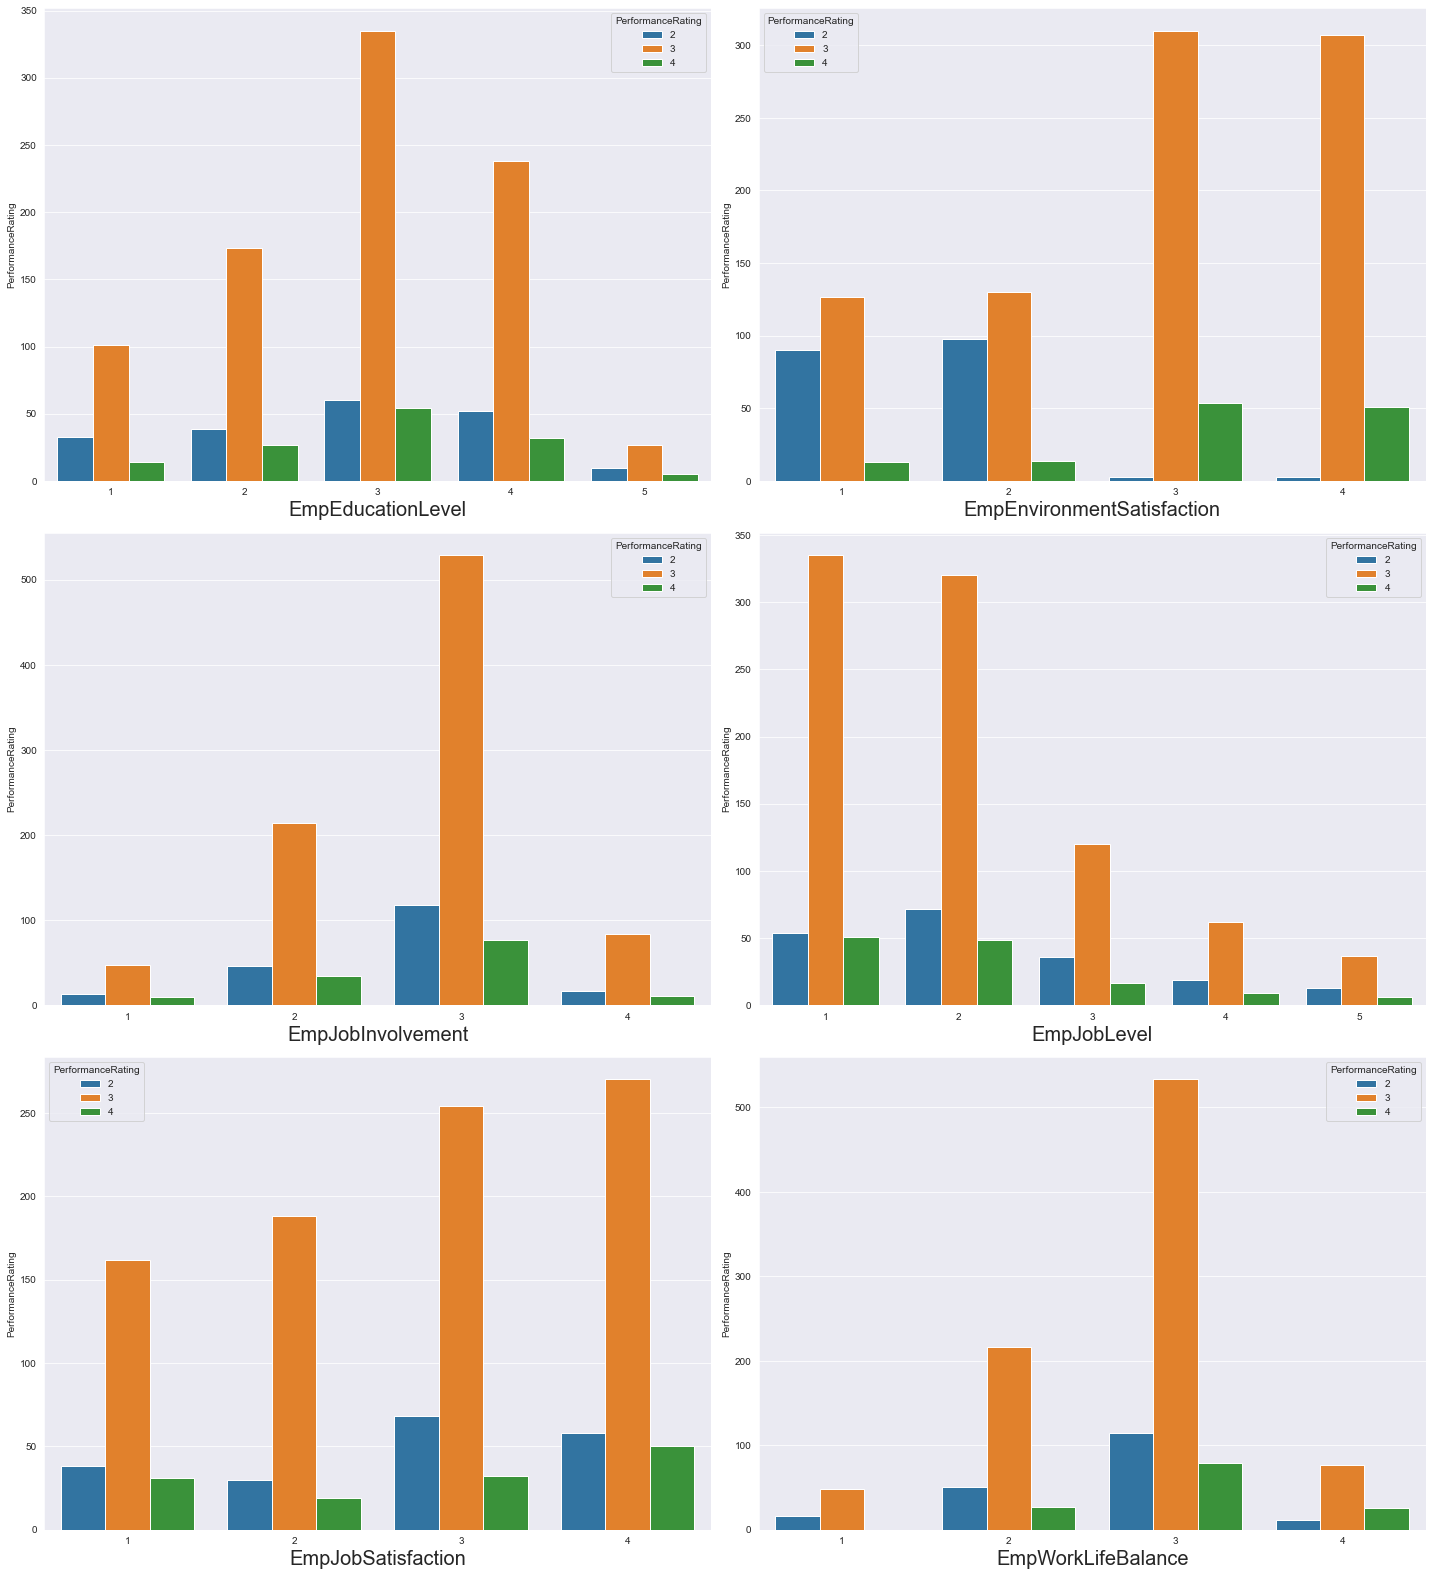

In [25]:
numerical = data[['EmpEducationLevel','EmpEnvironmentSatisfaction','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction',
                 'EmpWorkLifeBalance']]

plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in numerical: # iteration of columns / acessing the columns from count 
    if plotno<=7:    # set the limit
        plt.subplot(3,2,plotno) # # plotting 6 graphs (3-rows,2-columns) ,plotnumber is for count
        sns.countplot(x=numerical[column],hue=data.PerformanceRating) # Plotting count plots because the feature is categorical
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
        plt.ylabel('PerformanceRating')
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction


### Observations:
#### 15. Relationship between EmpEducationLevel and performance rating
* Those employee education level is [3,4 & 2] this employee have 3 peformance rating mostly
* If the performance rating is 2 & 4 then all eduaction level employee is less than 60.

#### 16. Relationship between EmpEnvironmentSatisfaction and performance rating
* Maximum no of employee enviorment statifaction is 3 and 4 with 3 performance rating.
* If the employee enviorment satisfaction is 1 & 2 that time the maximum employee have 2 performace rating.
* If the employee enviorment satisfaction is increases that time 4 performance rating also increases.

#### 17. Relationship between EmpJobInvolvement and performance rating
* Those employee job involvement is 2 & 3 this empluee have 3 performance rating mostly
* 2 & 4 performance rating eployee is less in all job involvment.


#### 18. Relationship between EmpJobLevel and performance rating
* If the employee job level is 1,2 & 3 that time most of the employee have 3 performance rating
* In all job levels 2 & 4 performance rating of all emplyee is less than 60.

#### 19. Relationship between EmpJobSatisfaction and performance rating
* Maximum 4 & 3 job satisfaction employee get 3 performance rating most of the time.
* In all job satisfaction 2 & 4 performance rating is less than 55 employee

#### 21. Relationship between EmpWorkLifeBalance and performance rating
* If the employee work life balance is 3 that time maximum no of employee have 3 performance rating.
* If the work life balance is 1 that time no one get 4 performance rating.

## MULTIVARIATE ANALYSIS

* Checking the relationship between two features with respect to target features

#### PLOT USED: 
**Line plot:** A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency of each value.
**Barplot:** It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

**1.Check the relationship between Age & Total work experiance with respect to target feature**

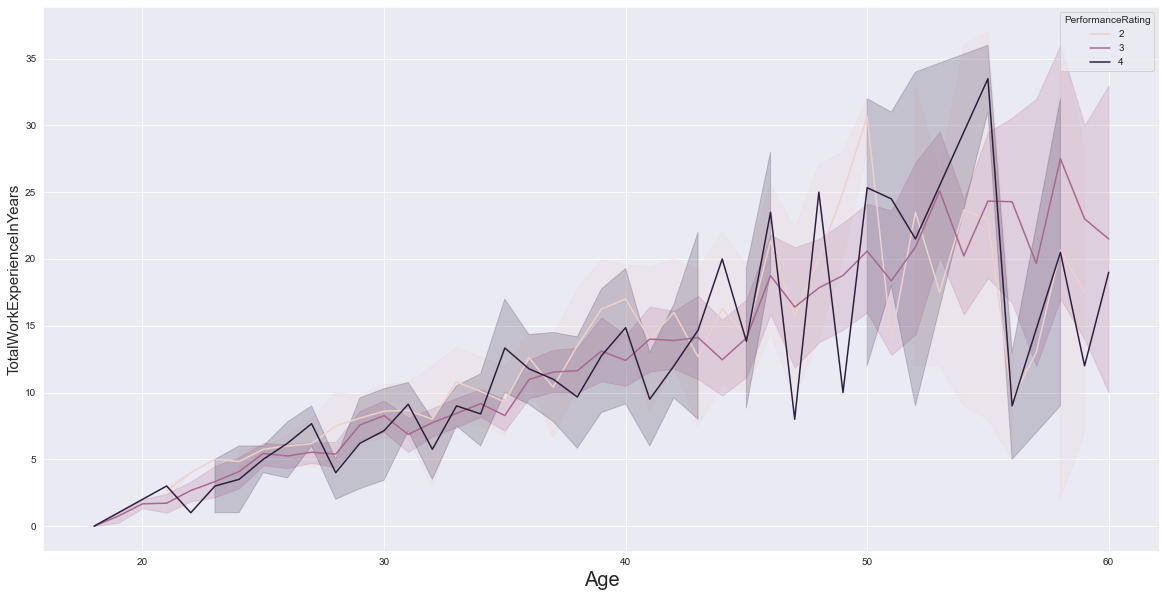

In [26]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Age',y='TotalWorkExperienceInYears',hue=data.PerformanceRating,data=data)
plt.xlabel('Age',fontsize=20)
plt.ylabel('TotalWorkExperienceInYears',fontsize=15)
plt.show()

**Observation:**
* If the age & total experiance is increases that time most of the employee performance rating is 4.
* Low age and minimum year experiance employee also 4 perfomace rating.
* At the age of 50 and 30 years of experiance employee have 2 performance rating.

**2.Check the relationship between Gender & Number Companies Worked with respect to target feature**

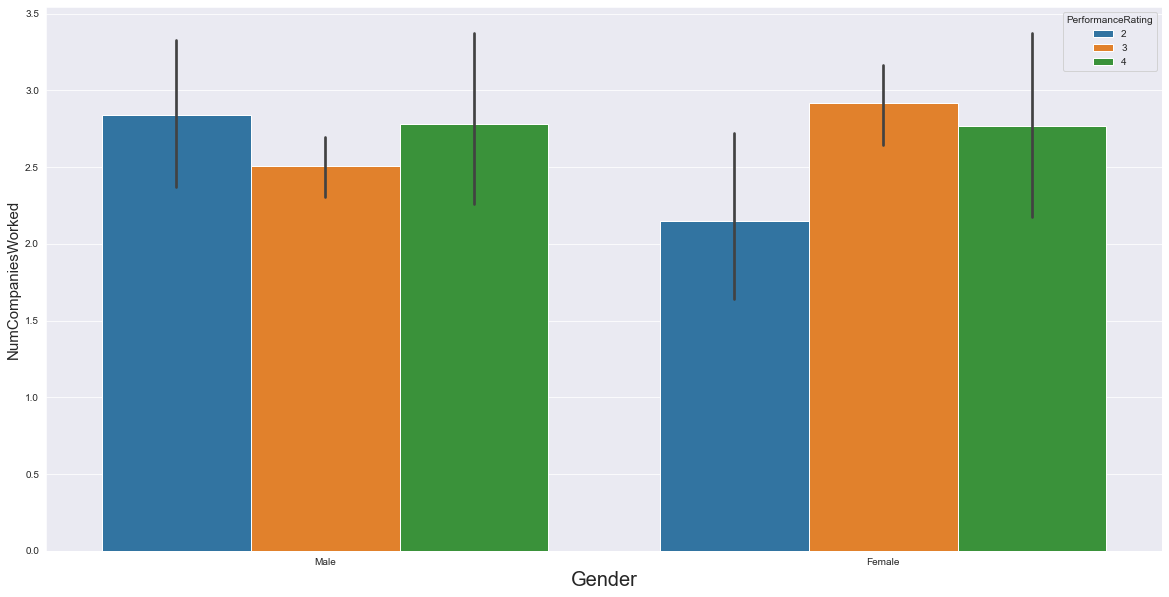

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(x='Gender',y='NumCompaniesWorked',hue=data.PerformanceRating,data=data)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('NumCompaniesWorked',fontsize=15)
plt.show()

**Observation:**
* If the gender is male and no of companies work is increses that time most of the performance rating is 2 & 4.
* If female work in less no companies that time performance rating is 2.
* 3 & 4 performance rating in female increase if the no of compaines worked is increses.

**3.Check the relationship between MaritalStatus & EmpLastSalaryHikePercent with respect to target feature**

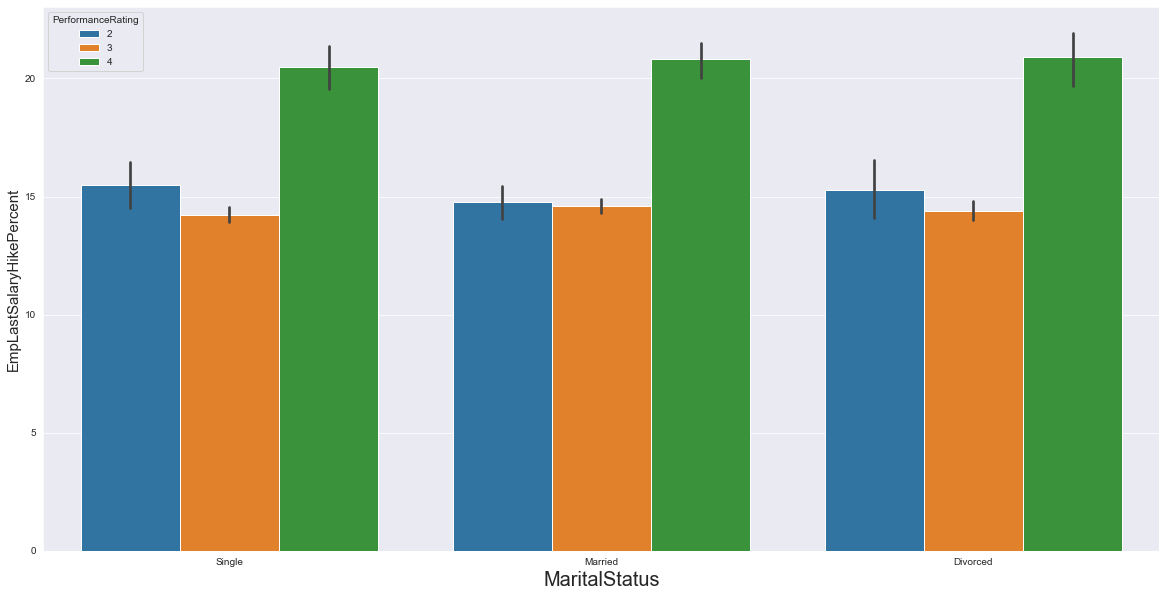

In [28]:
plt.figure(figsize=(20,10))
sns.barplot(x='MaritalStatus',y='EmpLastSalaryHikePercent',hue=data.PerformanceRating,data=data)
plt.xlabel('MaritalStatus',fontsize=20)
plt.ylabel('EmpLastSalaryHikePercent',fontsize=15)
plt.show()

**Observatopn:**
* In all marital status with maximum salary hike percent in last year is increases that time performance rating is 4.
* If salary hike percentage in last year is less than 15 that time performance rating is 2 & 3 in all marital status.

**4.Check the relationship between BusinessTravelFrequency & EmpEnvironmentSatisfaction with respect to target feature**

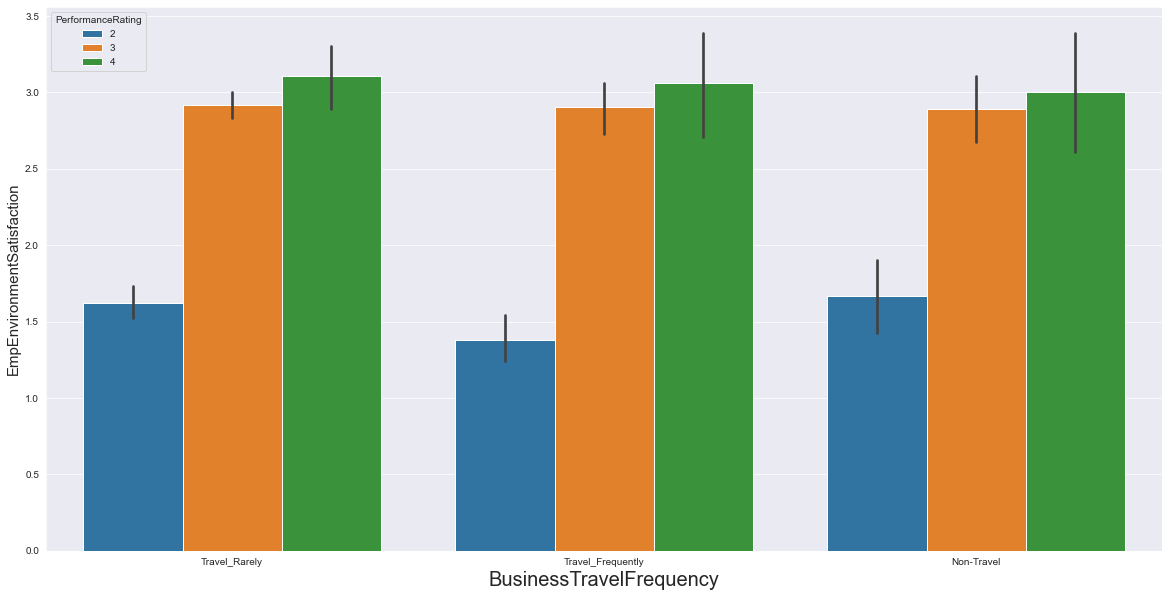

In [29]:
plt.figure(figsize=(20,10))
sns.barplot(x='BusinessTravelFrequency',y='EmpEnvironmentSatisfaction',hue=data.PerformanceRating,data=data)
plt.xlabel('BusinessTravelFrequency',fontsize=20)
plt.ylabel('EmpEnvironmentSatisfaction',fontsize=15)
plt.show()

**Observation:**
* If the employee enviorment satisfaction is high that time performance rating is 3 & 4 in all buisness travel frequency.
* Low employee enviorment satisfaction has 2 performance rating in all buisness travel frequency.

**5.Check the relationship between Attrition & YearsWithCurrManager with respect to target feature**

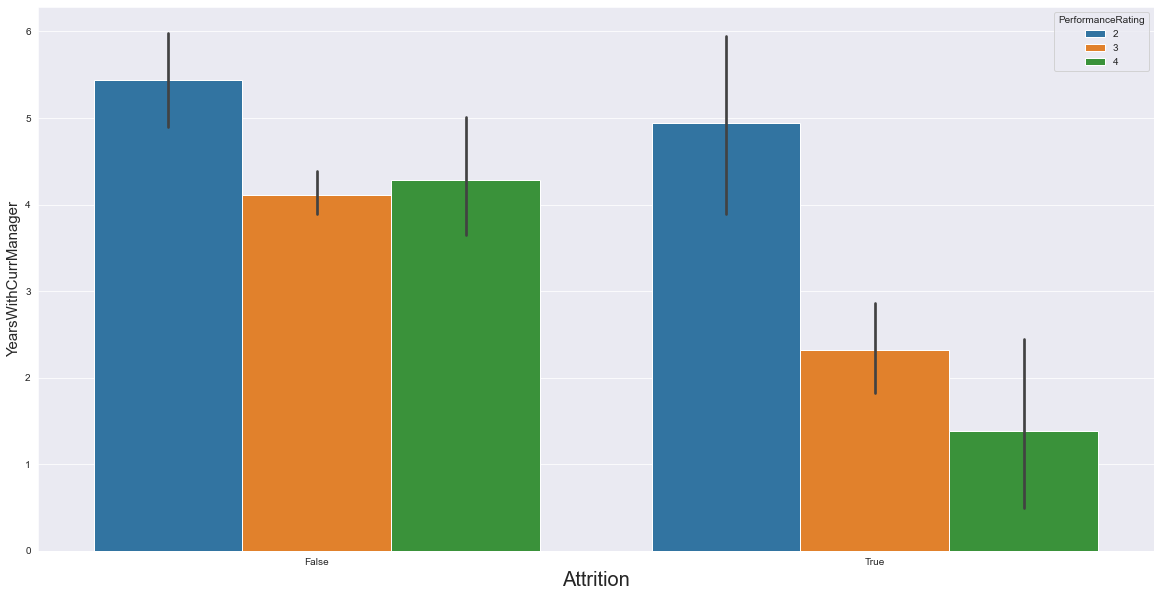

In [30]:
plt.figure(figsize=(20,10))
sns.barplot(x='Attrition',y='YearsWithCurrManager',hue=data.PerformanceRating,data=data)
plt.xlabel('Attrition',fontsize=20)
plt.ylabel('YearsWithCurrManager',fontsize=15)
plt.show()

**Observation:**
* If the employee current manager year is increses that time performance rating is 2 and 50-50% chances of employee to leave the company.
* those employee perfomance rating is 4 and current manger year is increases that time most of the employee not leave the company.

**6.Check the relationship between EducationBackground & ExperienceYearsInCurrentRole with respect to target feature**

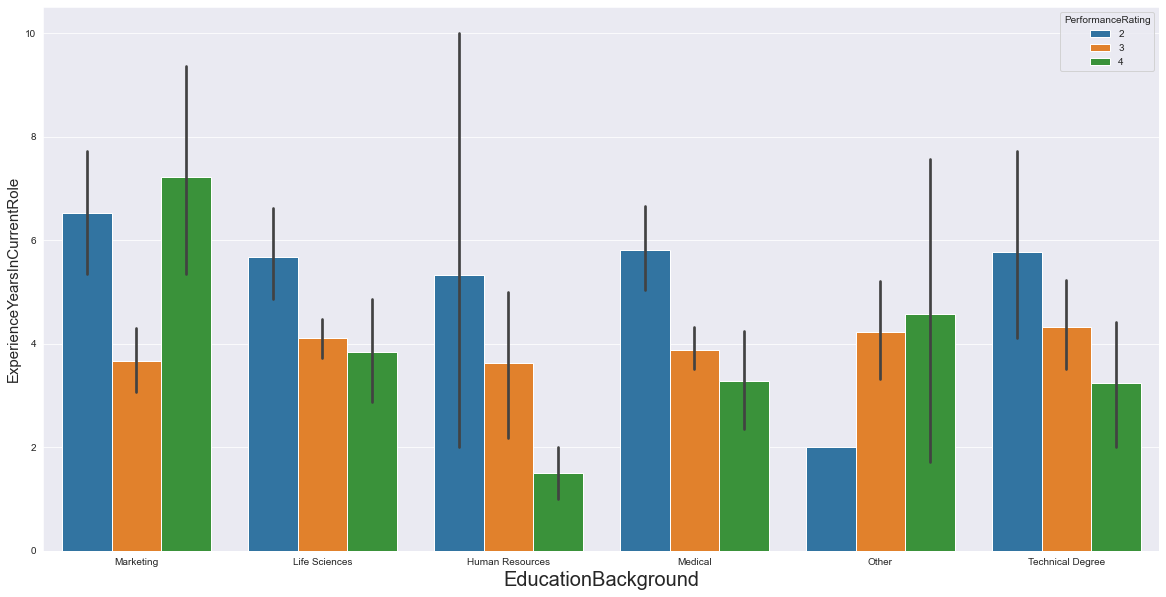

In [31]:
plt.figure(figsize=(20,10))
sns.barplot(x='EducationBackground',y='ExperienceYearsInCurrentRole',hue=data.PerformanceRating,data=data)
plt.xlabel('EducationBackground',fontsize=20)
plt.ylabel('ExperienceYearsInCurrentRole',fontsize=15)
plt.show()

**Observation:**
* If the current role experiance is increses of marketing education background employee has 4 performance rating most of the time
* In all education background with current role experiance is more than 5 then the performance rating of employee is 2.
* Life scineces, Medical, others , and technical degree education background employee has less than 4 year of experiance in current role that time performance rating is 3 & 4.

**7.Check the relationship between OverTime & DistanceFromHome with respect to target feature**

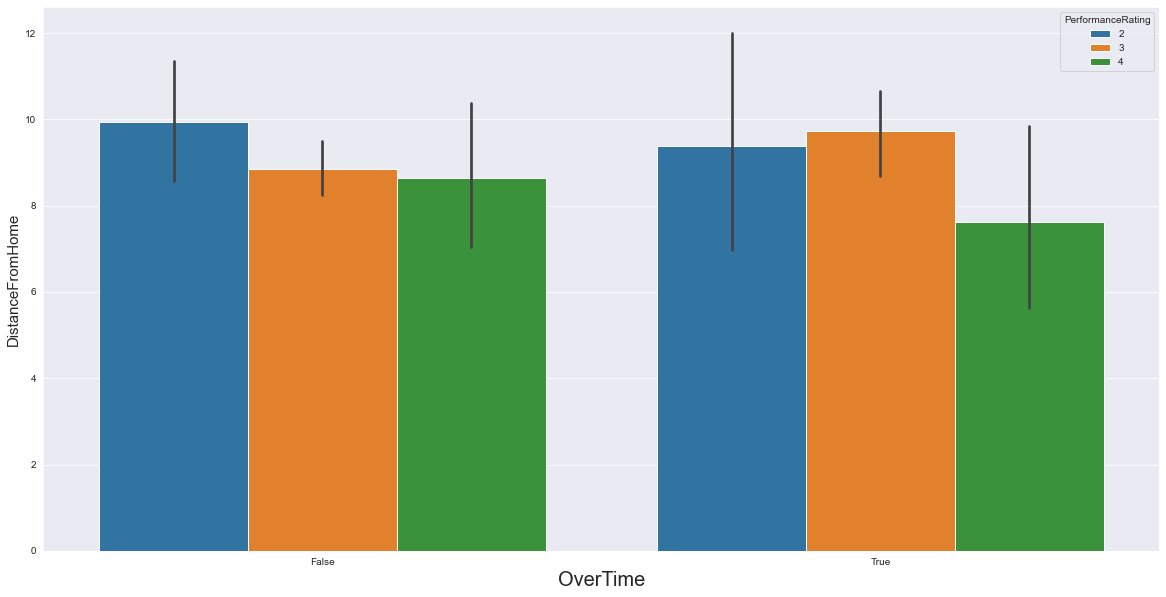

In [32]:
plt.figure(figsize=(20,10))
sns.barplot(x='OverTime',y='DistanceFromHome',hue=data.PerformanceRating,data=data)
plt.xlabel('OverTime',fontsize=20)
plt.ylabel('DistanceFromHome',fontsize=15)
plt.show()

**Observation:**
* If the distance from home is increses that time performance rating is constant with employee doing overtime as well as not doing overtime.

**8.Check the relationship between EmpDepartment & TrainingTimesLastYear with respect to target feature**

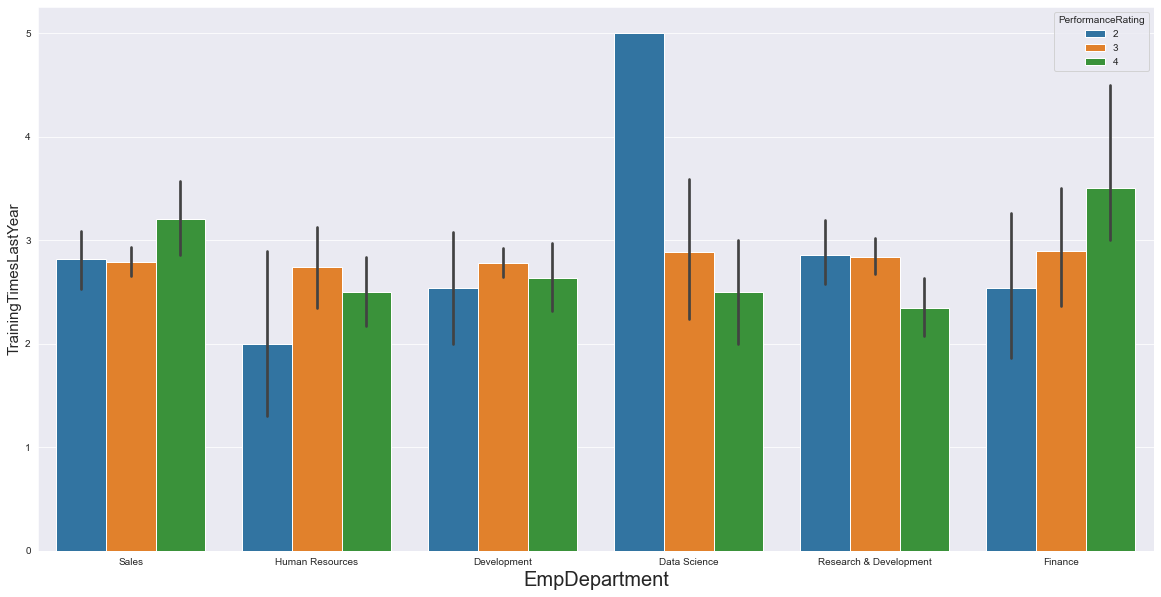

In [33]:
plt.figure(figsize=(20,10))
sns.barplot(x='EmpDepartment',y='TrainingTimesLastYear',hue=data.PerformanceRating,data=data)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('TrainingTimesLastYear',fontsize=15)
plt.show()

**Observation:**
* If the employee from data science department and most training time in last year then the performance rating is 2 maximum time.
* Other all employee department with less than 3 time training in last year then the peroformance rating is constant.

**10.Check the relationship between Attrition &  NumCompaniesWorked with respect to target feature**

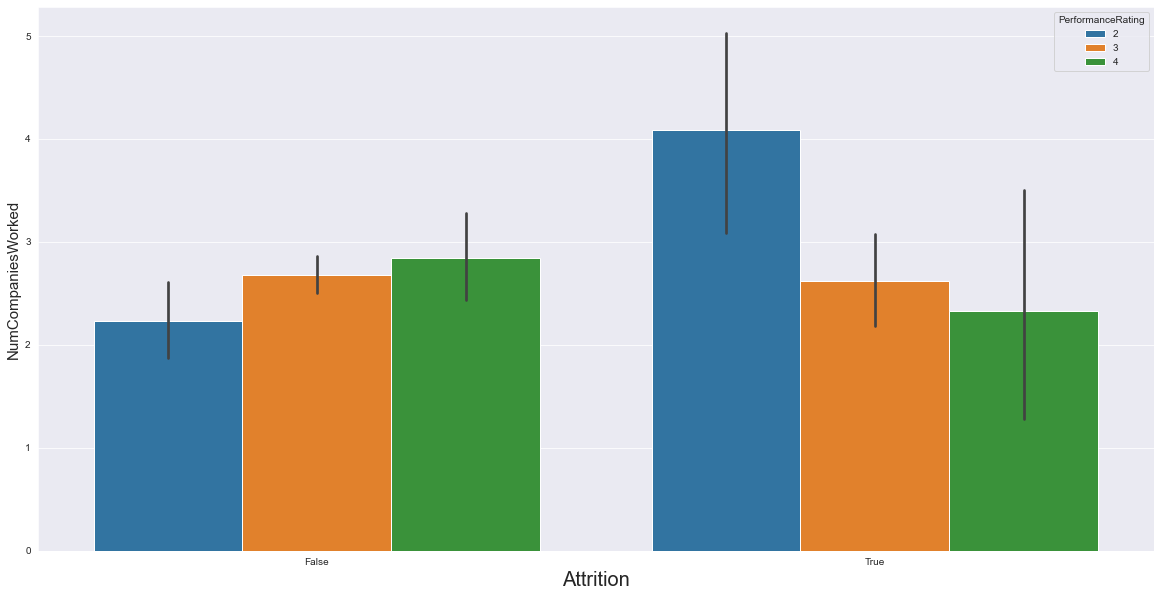

In [34]:
plt.figure(figsize=(20,10))
sns.barplot(x='Attrition',y='NumCompaniesWorked',hue=data.PerformanceRating,data=data)
plt.xlabel('Attrition',fontsize=20)
plt.ylabel('NumCompaniesWorked',fontsize=15)
plt.show()

**Observation:**
* If emplyee number of companies worked is increses that time most of the employee leave the company and their performance rating is 2
* Those employee have work in less no of companies they are not leave the company and their performance rating is constant.

#### CONCLUSION
* There are some features are positively correlated with performance rating( Target variable)
[Emp Environment Satisfaction,Emp Last Salary Hike Percent,Emp Work Life Balance]